In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import beta


# First taste of posterior probabilities

## Context:
Imagine a 4 sided globe where you toss and try to figure out what proportion of the globe is made of water (p). W is the number of Water observations, and L is the number of Land observations.

In [2]:
sample = [
    "W",
    "L",
    "W",
    "W",
    "W",
    "L",
    "W",
    "L",
    "W"
]

In [3]:
len(sample)

9

In [4]:
sum_w = len(list(filter(lambda x: x == "W", sample)))
sum_w

6

In [5]:
sum_l = len(list(filter(lambda x: x == "L", sample)))
sum_l

3

In [6]:
p_list = [0, 0.25, 0.5, 0.75, 1]

In [7]:
def relative_num_ways( p:float, w:int, l:int):
    """
    General formula to calculate the number of ways of observing Water (target variable)

    p is the proportion of water on the 4 sided globe
    w is the number of water observations
    l is the number of land observations
    
    """
    return ((4 * p) ** w) * ((4- 4 * p) ** l)

In [8]:
relative_num_ways(0.75, sum_w, sum_l)

729.0

In [46]:
relative_num_ways(1, 2, 8)

0

In [9]:
posterior_out = {}

for p in p_list:
    posterior = relative_num_ways(p, sum_w, sum_l)
    posterior_out[p] = posterior




In [10]:
posterior_out

{0: 0, 0.25: 27.0, 0.5: 512.0, 0.75: 729.0, 1: 0}

In [11]:
729/1268

0.5749211356466877

In [12]:
# Convert number of possible outcomes to probabilities
total_num_outcomes = sum(posterior_out.values())
for p, v in posterior_out.items():
    posterior_out[p] = v / total_num_outcomes


In [13]:
posterior_out.values()

dict_values([0.0, 0.021293375394321766, 0.4037854889589905, 0.5749211356466877, 0.0])

In [14]:
sum(posterior_out.values())

1.0

Text(0, 0.5, 'Posterior Probabilities')

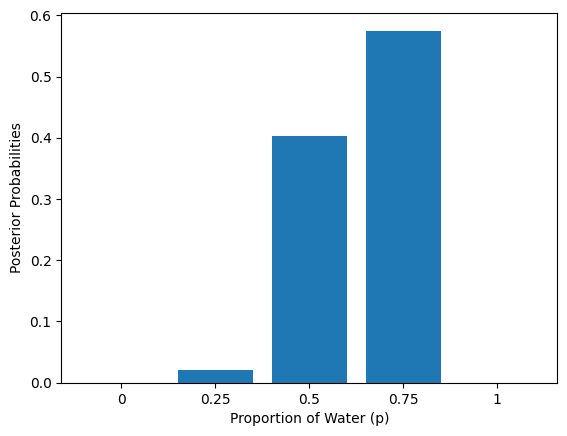

In [15]:
plt.bar(range(len(posterior_out)), posterior_out.values(), align='center')
plt.xticks(range(len(posterior_out)), posterior_out.keys())
plt.xlabel("Proportion of Water (p)")
plt.ylabel("Posterior Probabilities")

In [16]:
# Validate that sum of all posterior probabilities is 1

sum(posterior_out.values())

1.0

# Implement Generative Model

In [17]:
def globe_sampling(p, N=10):
    """
    Simulate N tosses of the 4 sided globe
    """
    return np.random.choice(a = ["W", "L"], size=int(N), p=[p, 1-p])


In [18]:
globe_sampling(0.5, 10)

array(['W', 'L', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1')

## How to test generative model?

### Test extreme settings (p=1, p=0)

In [19]:
# Test p=0
globe_sampling(0, 10)

array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1')

In [20]:

globe_sampling(1, 10)

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1')

## Test that large samples converge to the p value

In [21]:
len(list(filter(lambda x: x == "W", sample)))

6

In [22]:
len(list(filter(lambda x: x == "W",globe_sampling(p=0.5, N=1e4)))) / 1e4

0.5029

# Sampling from the Posterior Distribution

## Why is the posterior distribution of infinite N experiments == Beta Distribution?

https://www.youtube.com/watch?v=juF3r12nM5A 

In [23]:
import seaborn as sns

# Detour: Demonstrating that as more samples are added with the same ratio of a:b, the Beta distribution narrows. 
This represents a decrease in uncertainty

(array([6.86116454, 2.28705485, 4.57410969, 4.57410969, 4.57410969]),
 array([0.65838089, 0.70210525, 0.7458296 , 0.78955396, 0.83327832,
        0.87700267]),
 <BarContainer object of 5 artists>)

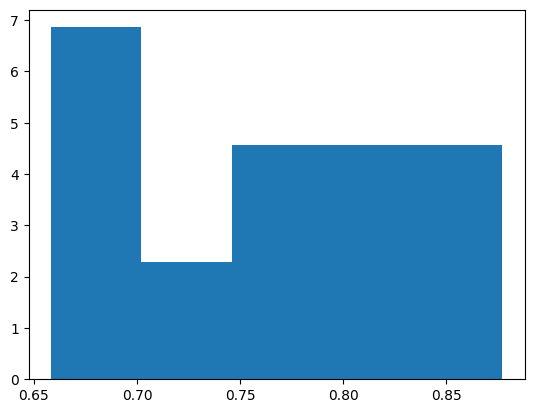

In [24]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 7+1, b = 3+1, size = 10), density = True, bins = "auto") # the underlying implication is that probability of a is always a/(a+b)

(array([ 2.1104499 ,  3.37671984,  5.48716975, 10.13015953,  6.75343969,
         6.33134971,  5.48716975,  2.53253988]),
 array([0.59538368, 0.61907531, 0.64276694, 0.66645857, 0.6901502 ,
        0.71384183, 0.73753346, 0.76122509, 0.78491672]),
 <BarContainer object of 8 artists>)

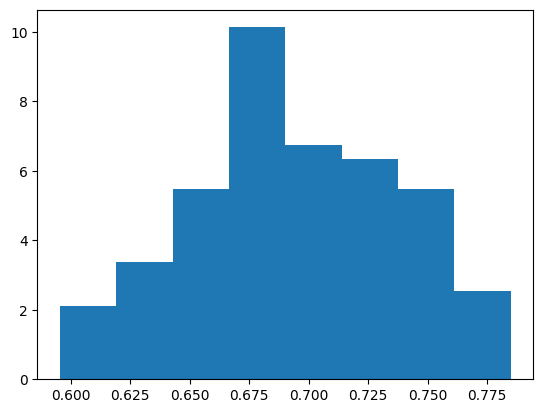

In [25]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 70+1, b = 30+1, size = 100), density = True, bins = "auto")


(array([ 0.49448829,  0.74173244,  1.97795316,  2.96692975,  2.7196856 ,
         8.15905681, 14.0929163 , 11.3732307 , 18.29606678, 24.47717042,
        25.71339114, 25.466147  , 22.7464614 , 24.22992627, 22.00472896,
        14.83464874,  9.88976582,  6.67559193,  4.69763877,  2.96692975,
         1.73070902,  0.74173244,  0.24724415]),
 array([0.65339172, 0.6574363 , 0.66148089, 0.66552547, 0.66957006,
        0.67361464, 0.67765923, 0.68170381, 0.6857484 , 0.68979298,
        0.69383757, 0.69788215, 0.70192674, 0.70597132, 0.71001591,
        0.71406049, 0.71810508, 0.72214966, 0.72619425, 0.73023883,
        0.73428342, 0.738328  , 0.74237259, 0.74641717]),
 <BarContainer object of 23 artists>)

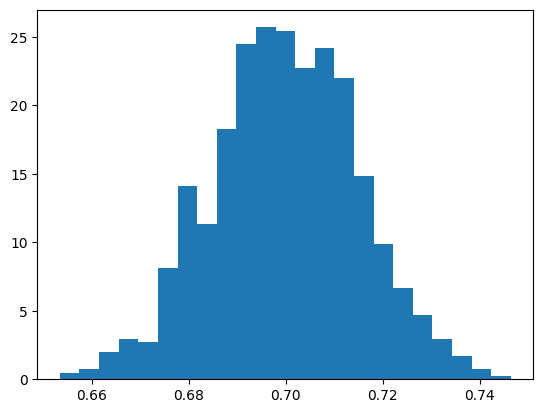

In [26]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 700+1, b = 300+1, size = 1000), density = True, bins = "auto")

(array([ 0.19606665,  0.39213329,  0.19606665,  1.17639988,  0.39213329,
         2.15673311,  2.5488664 ,  3.72526628,  4.70559951,  5.29379945,
         8.62693243, 12.54826536, 14.90106511, 17.64599816, 23.3319309 ,
        32.15492997, 38.82119594, 41.56612899, 37.84086271, 53.33012776,
        53.13406112, 56.27112746, 59.60426044, 56.85932739, 60.78066032,
        59.0160605 , 57.44752733, 50.97732801, 46.46779515, 34.70379638,
        33.72346314, 28.82179699, 21.95946437, 15.88139834, 12.54826536,
         9.21513237,  7.25446591,  3.92133292,  4.31346622,  1.56853317,
         0.98033323,  1.17639988,  0.78426658,  0.39213329,  0.58819994,
         0.39213329]),
 array([0.67623288, 0.67725295, 0.67827301, 0.67929307, 0.68031313,
        0.68133319, 0.68235325, 0.68337331, 0.68439337, 0.68541344,
        0.6864335 , 0.68745356, 0.68847362, 0.68949368, 0.69051374,
        0.6915338 , 0.69255387, 0.69357393, 0.69459399, 0.69561405,
        0.69663411, 0.69765417, 0.69867423, 0.69

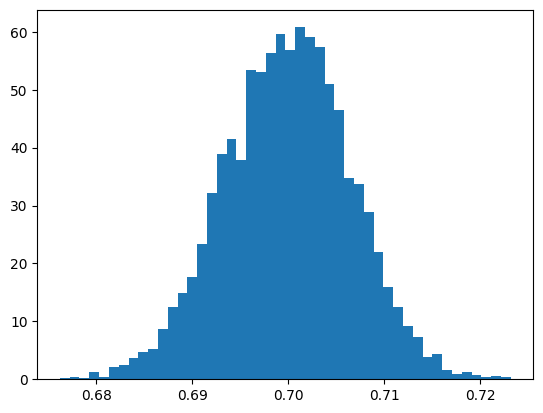

In [27]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 3500+1, b = 1500+1, size = 5000), density = True, bins = "auto")

## Detour: Thompson Sampling
https://www.youtube.com/watch?v=nkyDGGQ5h60

## Sampling from the beta distribution (posterior distribution)

In [28]:
from scipy.stats import beta

random_sample = beta.rvs(a = 6+1, b = 3+1, size = 1000)

# +1 is needed for a and b because the underlying formula uses (a-1) and (b-1)

In [29]:
random_sample

array([0.81749902, 0.46259094, 0.6854131 , 0.66110957, 0.67239369,
       0.63284336, 0.63565297, 0.747243  , 0.52416657, 0.38450048,
       0.46271793, 0.49028612, 0.8497431 , 0.331565  , 0.44461333,
       0.60297366, 0.51113335, 0.37235357, 0.82578159, 0.47267378,
       0.6968576 , 0.68323436, 0.84504373, 0.74442068, 0.67716228,
       0.74058039, 0.74330016, 0.77010138, 0.79077525, 0.73186598,
       0.58236318, 0.46976433, 0.8307944 , 0.65010612, 0.62957812,
       0.6261373 , 0.41149796, 0.70851488, 0.57080144, 0.67511727,
       0.76506474, 0.61268109, 0.69564435, 0.50239708, 0.73495333,
       0.35019216, 0.70819446, 0.81008664, 0.57463177, 0.78996859,
       0.80609765, 0.55206685, 0.60320367, 0.70478242, 0.79322913,
       0.31924282, 0.60983545, 0.765345  , 0.43510549, 0.48575385,
       0.43517408, 0.76790843, 0.85592302, 0.83153039, 0.69802247,
       0.41423598, 0.6005042 , 0.29774957, 0.61718411, 0.50065547,
       0.71691594, 0.61190365, 0.63090773, 0.85677741, 0.77080

(array([0.02749317, 0.19245217, 0.164959  , 0.329918  , 0.494877  ,
        0.60484967, 1.29217884, 1.09972667, 1.53961734, 2.22694651,
        2.22694651, 3.32667318, 2.63934401, 2.77680984, 2.11697384,
        1.95201484, 1.95201484, 1.26468567, 0.71482234, 0.43989067,
        0.10997267]),
 array([0.19610801, 0.23248068, 0.26885336, 0.30522603, 0.3415987 ,
        0.37797138, 0.41434405, 0.45071673, 0.4870894 , 0.52346208,
        0.55983475, 0.59620742, 0.6325801 , 0.66895277, 0.70532545,
        0.74169812, 0.7780708 , 0.81444347, 0.85081614, 0.88718882,
        0.92356149, 0.95993417]),
 <BarContainer object of 21 artists>)

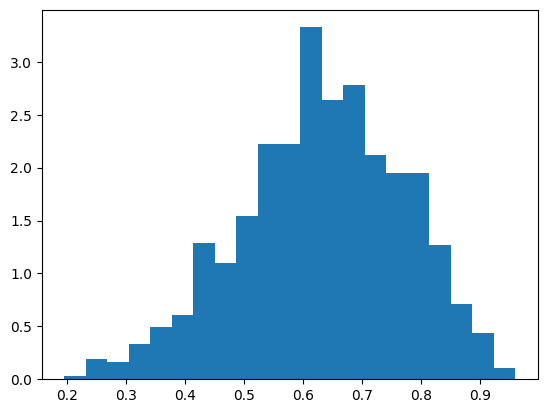

In [30]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 6+1, b = 3+1, size = 1000), density = True, bins = "auto")

## Deriving the Posterior Predictive Distribution

## Predictive Distribution for a given p (assuming 9 tosses per experiment)

([<matplotlib.axis.XTick at 0x297aad1c2d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

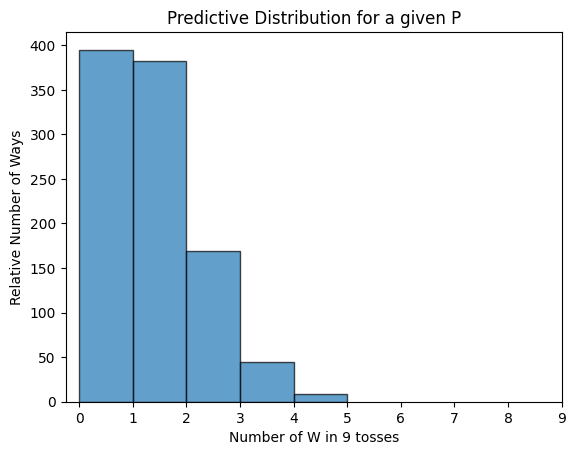

In [86]:
# Predictive distribution for a FIXED p = 0.7
p_fixed = 0.1
predictive_samples = []
for _ in range(1000):
    experiment = globe_sampling(p_fixed, N=9)
    predictive_samples.append(sum(x == "W" for x in experiment))

# Visualize the predictive distribution for a given p
plt.hist(predictive_samples, bins="auto", alpha=0.7, edgecolor='black')
plt.xlabel("Number of W in 9 tosses")
plt.ylabel("Relative Number of Ways")
plt.title("Predictive Distribution for a given P")
plt.xticks(range(10))

## Posterior Distribution for all values of P sampled from posterior distribution

In [87]:
# Posterior Predictive Distribution: count W in each simulated experiment
w_counts = []  # Store number of W's from each experiment
all_experiments = []  # Store all experiments

for p in random_sample:
    sampling_experiments = globe_sampling(p, N=9)
    num_w = len(list(filter(lambda x: x == "W", sampling_experiments)))
    w_counts.append(num_w)  # Accumulate the counts
    all_experiments.append(sampling_experiments)  # Store all experiments for intuition later



([<matplotlib.axis.XTick at 0x297acfe0550>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

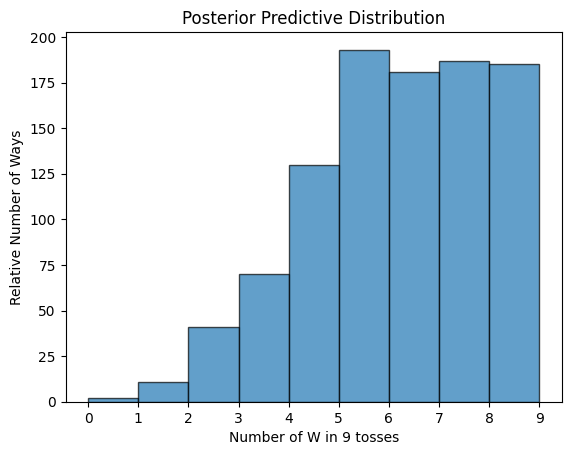

In [88]:
# Visualize the posterior predictive distribution
plt.hist(w_counts, bins="auto", alpha=0.7, edgecolor='black')
plt.xlabel("Number of W in 9 tosses")
plt.ylabel("Relative Number of Ways")
plt.title("Posterior Predictive Distribution")
plt.xticks(range(10))

In [89]:
all_experiments

[array(['W', 'L', 'L', 'W', 'W', 'L', 'W', 'L', 'W'], dtype='<U1'),
 array(['W', 'L', 'L', 'W', 'L', 'L', 'L', 'W', 'W'], dtype='<U1'),
 array(['W', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'W'], dtype='<U1'),
 array(['W', 'L', 'L', 'W', 'W', 'W', 'W', 'W', 'L'], dtype='<U1'),
 array(['L', 'W', 'W', 'W', 'L', 'W', 'W', 'L', 'L'], dtype='<U1'),
 array(['W', 'L', 'W', 'W', 'L', 'L', 'W', 'W', 'W'], dtype='<U1'),
 array(['L', 'W', 'W', 'L', 'L', 'W', 'W', 'W', 'L'], dtype='<U1'),
 array(['W', 'W', 'W', 'W', 'W', 'W', 'L', 'L', 'W'], dtype='<U1'),
 array(['W', 'L', 'L', 'W', 'L', 'W', 'L', 'W', 'L'], dtype='<U1'),
 array(['W', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'W'], dtype='<U1'),
 array(['L', 'L', 'W', 'W', 'W', 'W', 'L', 'L', 'W'], dtype='<U1'),
 array(['W', 'W', 'L', 'L', 'L', 'W', 'W', 'W', 'L'], dtype='<U1'),
 array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'W'], dtype='<U1'),
 array(['W', 'L', 'L', 'L', 'L', 'L', 'L', 'W', 'W'], dtype='<U1'),
 array(['W', 'L', 'L', 'L', 'L', 'L', 'W', 'W', 